# Problem Statement
- In this project i will do text classification.
- The goal of this project to classify tht which text related to ehich category.

# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df=pd.read_csv("BBC News Train.csv")
df.head(2)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business


# Data Preprocessing
- Shape 
- Null values
- Duplicates Values
- Datatypes

In [3]:
df.shape

(1490, 3)

In [4]:
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

# Conclussion
- Data contain `1490` rows and `3` columns but we will drop `ArticleId` column b/c we donot need `ArticleId`.
- There is no null values.
- There is no duplicates values.

In [7]:
df.drop(columns=['ArticleId'],inplace=True)

In [8]:
df.head(2)

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business


# Check the distrubution of `Target` columns

In [9]:
x=df['Category'].value_counts()
x

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [10]:
df['Category'].value_counts(normalize=True)*100

Category
sport            23.221477
business         22.550336
politics         18.389262
entertainment    18.322148
tech             17.516779
Name: proportion, dtype: float64

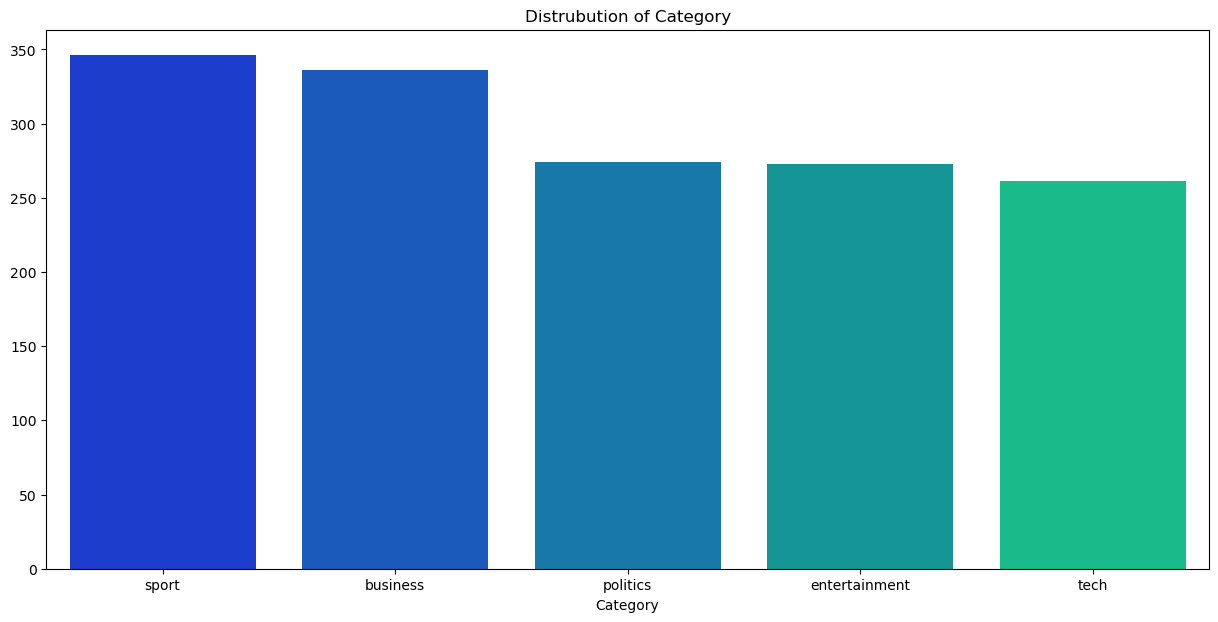

In [11]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of Category")
sns.barplot(x=x.index,
           y=x.values,palette='winter')
plt.show()

In [12]:
df.head(2)

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business


# Text Preprocessing
- Convert text into lower case
- Remove unecessary char
- Convert text into token
- Limitization
- Convert text into vector

In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords

In [14]:
def text_preprocess(text):
    """
    1- Convert text into lower case
    2- Remove unecessary char
    3- Convert text into token
    4- Limitization
    5- Convert text into vector
    """
    # Lower Case
    text=text.lower()
    
    # Remove unecessary char
    new_text=re.sub(r"[^a-zA-Z0-9\s\$\£\.\,]"," ",text)
    
    # Convert text into token
    token=word_tokenize(new_text)
    
    # remove stop word
    new_text=[word for word in token if word not in set(stopwords.words("english"))]
    
    # Apply limitization
    limitizer=WordNetLemmatizer()
    new_text=[limitizer.lemmatize(word) for word in new_text]
    
    
    return " ".join(new_text)

# Test the fun

In [15]:
df['Text'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [16]:
text_preprocess('worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud  arguing that auditors did not alert him to any problems.  ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief  giving only  brief  answers himself. the prosecution s star witness  former worldcom financial chief scott sullivan  has said that mr ebbers ordered accounting adjustments at the firm  telling him to  hit our books . however  ms cooper said mr sullivan had not mentioned  anything uncomfortable  about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004  and is now known as mci. last week  mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.')

'worldcom ex bos launch defence lawyer defending former worldcom chief bernie ebbers battery fraud charge called company whistleblower first witness . cynthia cooper worldcom ex head internal accounting alerted director irregular accounting practice u telecom giant 2002. warning led collapse firm following discovery $ 11bn £5.7bn accounting fraud . mr ebbers pleaded guilty charge fraud conspiracy . prosecution lawyer argued mr ebbers orchestrated series accounting trick worldcom ordering employee hide expense inflate revenue meet wall street earnings estimate . m cooper run consulting business told jury new york wednesday external auditor arthur andersen approved worldcom accounting early 2001 2002. said andersen given green light procedure practice used worldcom . mr ebber lawyer said unaware fraud arguing auditor alert problem . m cooper also said shareholder meeting mr ebbers often passed technical question company finance chief giving brief answer . prosecution star witness former 

# Apply Fun in the Pipeline

# Encode the target col

In [17]:
sorted(df['Category'].value_counts().index)

['business', 'entertainment', 'politics', 'sport', 'tech']

In [18]:
df['Category']=df['Category'].map({
    "business":0,
    "entertainment":1,
    "politics":2,
    'sport':3,
    'tech':4
})

In [20]:
# np.hstack(df['Category'].values.reshape(-1,1))
# np.hstack([df['Category'].values.reshape(-1,1), df['Category'].values.reshape(-1,1)],axis=1)

# Train test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(df[['Text']],df['Category'],test_size=0.2,random_state=43)

In [23]:
x_train.head(1)

,Text
1095,goldsmith denies war advice claim the attorney...


In [24]:
x_test.head(1)

,Text
1112,johnson announces june retirement former engla...


In [25]:
y_train.head(1)

1095    2
Name: Category, dtype: int64

In [26]:
y_test.head(1)

1112    3
Name: Category, dtype: int64

# Build Pipeline

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [28]:
pipe=Pipeline(steps=[
    ("encode",TfidfVectorizer(max_features=1000,preprocessor=text_preprocess))
])
pipe

Pipeline(steps=[('encode',
                 TfidfVectorizer(max_features=1000,
                                 preprocessor=<function text_preprocess at 0x00000205805A7E20>))])

# Build a transformer

In [29]:
transformer=ColumnTransformer(transformers=[
    ("transform",pipe,'Text')
],remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('transform',
                                 Pipeline(steps=[('encode',
                                                  TfidfVectorizer(max_features=1000,
                                                                  preprocessor=<function text_preprocess at 0x00000205805A7E20>))]),
                                 'Text')])

# Build a final Pipeline

In [30]:
from sklearn.linear_model import LogisticRegression

In [77]:
final=Pipeline(steps=[
    ("transform",transformer),
    ("model",LogisticRegression())
])
final

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transform',
                                                  Pipeline(steps=[('encode',
                                                                   TfidfVectorizer(max_features=1000,
                                                                                   preprocessor=<function text_preprocess at 0x00000205805A7E20>))]),
                                                  'Text')])),
                ('model', LogisticRegression())])

In [78]:
final.fit(x_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transform',
                                                  Pipeline(steps=[('encode',
                                                                   TfidfVectorizer(max_features=1000,
                                                                                   preprocessor=<function text_preprocess at 0x00000205805A7E20>))]),
                                                  'Text')])),
                ('model', LogisticRegression())])

In [79]:
pre=final.predict(x_test)

# Evulation

In [80]:
from sklearn.metrics import accuracy_score,classification_report

In [81]:
accuracy_score(y_test,pre)

0.9697986577181208

In [82]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        74
           1       0.96      0.94      0.95        54
           2       0.96      0.96      0.96        54
           3       0.99      1.00      0.99        68
           4       0.96      0.94      0.95        48

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



# Testing on test data

In [83]:
test_df=pd.read_csv('BBC News Test.csv')
test_df.head(2)

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...


In [84]:
test_df[['Text']]

,Text
0,qpr keeper day heads for preston queens park r...
1,software watching while you work software that...
2,d arcy injury adds to ireland woe gordon d arc...
3,india s reliance family feud heats up the ongo...
4,boro suffer morrison injury blow middlesbrough...
...,...
730,eu to probe alitalia state aid the european ...
731,u2 to play at grammy awards show irish rock ba...
732,sport betting rules in spotlight a group of mp...
733,alfa romeos to get gm engines fiat is to sto...


In [85]:
test_pre=final.predict(test_df[['Text']])

In [86]:
test_pre

array([3, 4, 3, 0, 3, 3, 2, 2, 1, 0, 0, 4, 2, 4, 1, 3, 2, 4, 1, 1, 0, 2,
       3, 0, 2, 3, 0, 3, 3, 0, 2, 4, 0, 0, 3, 3, 3, 0, 1, 0, 4, 2, 1, 4,
       3, 4, 1, 0, 2, 0, 2, 0, 0, 0, 4, 2, 4, 1, 3, 4, 3, 1, 4, 2, 1, 1,
       3, 4, 3, 3, 4, 3, 0, 2, 4, 3, 4, 4, 4, 1, 2, 3, 1, 1, 0, 1, 0, 1,
       0, 4, 0, 2, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 0, 3, 2, 3, 2, 1,
       3, 0, 1, 3, 2, 3, 2, 3, 2, 0, 0, 0, 1, 1, 4, 3, 0, 1, 0, 1, 0, 2,
       2, 4, 0, 0, 2, 4, 1, 3, 0, 4, 3, 1, 2, 3, 3, 1, 1, 4, 0, 4, 2, 4,
       3, 3, 3, 3, 1, 4, 0, 4, 0, 4, 0, 4, 1, 4, 4, 2, 0, 2, 0, 0, 1, 2,
       4, 0, 0, 4, 3, 2, 3, 2, 0, 4, 2, 0, 2, 1, 2, 0, 1, 3, 3, 4, 0, 4,
       2, 0, 3, 2, 0, 1, 0, 0, 3, 4, 0, 3, 1, 1, 3, 1, 3, 4, 2, 1, 3, 1,
       3, 1, 2, 0, 4, 1, 0, 2, 0, 4, 0, 3, 2, 2, 0, 2, 3, 0, 1, 2, 3, 2,
       0, 3, 4, 0, 2, 0, 2, 0, 0, 3, 4, 2, 1, 4, 1, 4, 3, 3, 4, 3, 3, 3,
       1, 3, 2, 4, 0, 3, 0, 3, 0, 3, 1, 0, 0, 1, 2, 0, 3, 3, 4, 3, 3, 1,
       0, 3, 4, 2, 1, 0, 0, 2, 3, 1, 2, 0, 3, 3, 4,

In [87]:
test_df['Category']=test_pre

In [88]:
test_df.tail(5)

,ArticleId,Text,Category
730,1923,eu to probe alitalia state aid the european ...,0
731,373,u2 to play at grammy awards show irish rock ba...,1
732,1704,sport betting rules in spotlight a group of mp...,4
733,206,alfa romeos to get gm engines fiat is to sto...,0
734,471,citizenship event for 18s touted citizenship c...,2


In [89]:
test_df.drop(columns=['Text']).to_csv("submission.csv",index=False)

In [90]:
test=pd.DataFrame({
    "Text":'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud  arguing that auditors did not alert him to any problems.  ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief  giving only  brief  answers himself. the prosecution s star witness  former worldcom financial chief scott sullivan  has said that mr ebbers ordered accounting adjustments at the firm  telling him to  hit our books . however  ms cooper said mr sullivan had not mentioned  anything uncomfortable  about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004  and is now known as mci. last week  mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.'
},index=[0])

In [91]:
final.predict(test)

array([0], dtype=int64)